In [ ]:
!wget https://www.dropbox.com/s/10hypdfqbtng403/Final%20covid_norma_pneumonial.zip?dl=0

--2020-11-17 19:58:53--  https://www.dropbox.com/s/10hypdfqbtng403/Final%20covid_norma_pneumonial.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/10hypdfqbtng403/Final%20covid_norma_pneumonial.zip [following]
--2020-11-17 19:58:54--  https://www.dropbox.com/s/raw/10hypdfqbtng403/Final%20covid_norma_pneumonial.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd090fc183a60fb414ae1115e1c.dl.dropboxusercontent.com/cd/0/inline/BDZ4OGpg9WvvkYgvOCuxUvnS8WMsxDsvyXiqguIlulXO0aOwgN0Tp6LHt8v3gSW4X04RqJjE6A90wtsWfEz74dwzlxfJ5D2PMH86rl4Yb7qylphdeCwTh_UcUFCMYzQta2Q/file# [following]
--2020-11-17 19:58:54--  https://ucd090fc183a60fb414ae1115e1c.dl.dropboxusercontent.com/cd/0/inline/BDZ4OGpg9WvvkYgvOCuxUvnS8WMsxDsvyXiqguIlu

In [ ]:
!unzip 'Final covid_norma_pneumonial.zip?dl=0'

Streaming output truncated to the last 5000 lines.
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (345).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (346).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (347).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (348).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (349).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (35).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (350).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (351).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (352).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (353).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (354).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (355).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (356).png  
  inflating: Final covid_norma_pneumonial/NORMAL/NORMAL (357).png 

In [ ]:
import glob
import numpy as np
from keras.preprocessing.image import load_img,img_to_array
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
img_size = (224,224)
dir_name = 'Final covid_norma_pneumonial/COVID/'
img_list = glob.glob(dir_name + '/*')

list_covid = []
for img in img_list:
    temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_covid.append(temp_img_array)
list_covid = np.array(list_covid)
list_covid2 = list_covid.reshape(-1,50176)
df_covid=pd.DataFrame(list_covid2)
df_covid['label'] = np.full(df_covid.shape[0],2)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
img_size = (224,224)
dir_name2 = 'Final covid_norma_pneumonial/NORMAL/'
img_list2 = glob.glob(dir_name2 + '/*')

list_normal = []
for img in img_list2:
    temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_normal.append(temp_img_array)
list_normal = np.array(list_normal)
list_normal2 = list_normal.reshape(-1,50176)
df_normal=pd.DataFrame(list_normal2)
df_normal['label'] = np.full(df_normal.shape[0],0)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
img_size = (224,224)
dir_name3 = 'Final covid_norma_pneumonial/PNEUMONIA'
img_list3 = glob.glob(dir_name3 + '/*')

list_others = []
for img in img_list3:
    temp_img = load_img(img,grayscale=True,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    list_others.append(temp_img_array)
list_others = np.array(list_others)
list_others2 = list_others.reshape(-1,50176)
df_others=pd.DataFrame(list_others2)
df_others['label'] = np.full(df_others.shape[0],1)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
Df = pd.concat([df_covid, df_normal , df_others], ignore_index=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Df.iloc[:,0:-1], Df.iloc[:,-1], test_size=0.20, random_state=0)
x_test, x_val, y_test, y_val = train_test_split(Df.iloc[:,0:-1], Df.iloc[:,-1], test_size=0.20, random_state=0)
X_train = x_train.values.reshape(-1,224,224,1)
X_test = x_test.values.reshape(-1,224,224,1)
X_Val = x_val.values.reshape(-1,224,224,1)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_val=to_categorical(y_val)

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten,MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
model_chkpt = ModelCheckpoint('best_mod_CovidNet20_multiclass.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [ ]:
#Model Defining
model=Sequential()
model.add(BatchNormalization(input_shape=(224,224,1)))
model.add(Conv2D(32,kernel_size=(3,3),
                activation='relu',
                padding='same'))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(128,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512,kernel_size=(3,3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 224, 224, 1)       4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)      

In [ ]:
import keras as keras
METRICS=[
    keras.metrics.Precision(), 
    keras.metrics.Recall(),
    'accuracy',
    keras.metrics.SensitivityAtSpecificity(0.9),
    keras.metrics.SpecificityAtSensitivity(0.9),
]
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=METRICS
)

In [ ]:
history = model.fit(X_train, Y_train, 
          validation_data=(X_test,Y_test),
          epochs=15, batch_size=32, shuffle=True, 
          callbacks=[model_chkpt ,early_stopping]
         )

Epoch 1/15
153/153 [==============================] - 13s 83ms/step - loss: 0.8563 - precision_1: 0.7248 - recall_1: 0.6493 - accuracy: 0.6946 - sensitivity_at_specificity_1: 0.5992 - specificity_at_sensitivity_1: 0.4802 - val_loss: 1.1261 - val_precision_1: 0.6989 - val_recall_1: 0.6989 - val_accuracy: 0.6989 - val_sensitivity_at_specificity_1: 0.0000e+00 - val_specificity_at_sensitivity_1: 0.0000e+00
Epoch 2/15
153/153 [==============================] - 12s 76ms/step - loss: 0.4710 - precision_1: 0.8620 - recall_1: 0.8202 - accuracy: 0.8410 - sensitivity_at_specificity_1: 0.8633 - specificity_at_sensitivity_1: 0.8425 - val_loss: 0.4183 - val_precision_1: 0.8642 - val_recall_1: 0.8437 - val_accuracy: 0.8560 - val_sensitivity_at_specificity_1: 0.8916 - val_specificity_at_sensitivity_1: 0.8822
Epoch 3/15
153/153 [==============================] - 12s 75ms/step - loss: 0.3059 - precision_1: 0.9114 - recall_1: 0.8813 - accuracy: 0.8967 - sensitivity_at_specificity_1: 0.9425 - specificity_

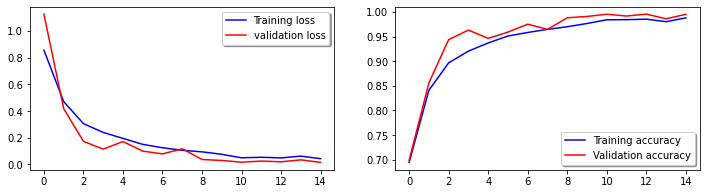

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 3))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

<function matplotlib.pyplot.show>

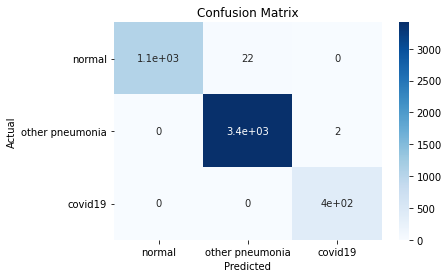

In [ ]:
plt.figure()

ax = plt.subplot()

ax.set_title('Confusion Matrix')
pred = model.predict_classes(X_test)
Y_TEST = np.argmax(Y_test, axis =1)
cm = metrics.confusion_matrix(Y_TEST,pred)
classes=['normal', 'other pneumonia', 'covid19']
sns.heatmap(cm, annot=True,xticklabels=classes, yticklabels=classes,cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_TEST, pred))
print('normal = 0 , other pneumonia = 1, covid19 = 2')


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1077
           1       0.99      1.00      1.00      3416
           2       0.99      1.00      1.00       395

    accuracy                           1.00      4888
   macro avg       1.00      0.99      0.99      4888
weighted avg       1.00      1.00      1.00      4888

normal = 0 , other pneumonia = 1, covid19 = 2


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_TEST, pred))
print('normal = 0 , other pneumonia = 1, covid19 = 2')

[[1055   22    0]
 [   0 3414    2]
 [   0    0  395]]
normal = 0 , other pneumonia = 1, covid19 = 2


<function matplotlib.pyplot.show>

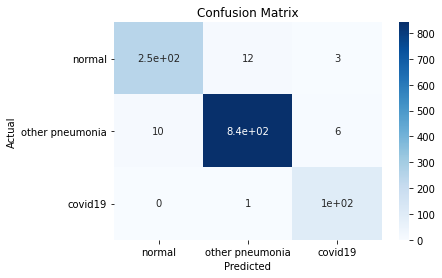

In [ ]:
plt.figure()

ax = plt.subplot()

ax.set_title('Confusion Matrix')
pred = model.predict_classes(X_Val)
Y_VAL = np.argmax(Y_val, axis =1)
cm = metrics.confusion_matrix(Y_VAL,pred)
classes=['normal', 'other pneumonia', 'covid19']
sns.heatmap(cm, annot=True,xticklabels=classes, yticklabels=classes,cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_VAL, pred))
print('normal = 0 , other pneumonia = 1, covid19 = 2')


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       264
           1       0.98      0.98      0.98       857
           2       0.92      0.99      0.95       101

    accuracy                           0.97      1222
   macro avg       0.95      0.97      0.96      1222
weighted avg       0.97      0.97      0.97      1222

normal = 0 , other pneumonia = 1, covid19 = 2


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_VAL, pred))
print('normal = 0 , other pneumonia = 1, covid19 = 2')

[[249  12   3]
 [ 10 841   6]
 [  0   1 100]]
normal = 0 , other pneumonia = 1, covid19 = 2


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

PRED = to_categorical(pred)
y = Df['label'].values
# Binarize the output
y = label_binarize(y, classes=[0,1,2])
n_classes = y.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
       fpr[i], tpr[i], _ = roc_curve(Y_test[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])

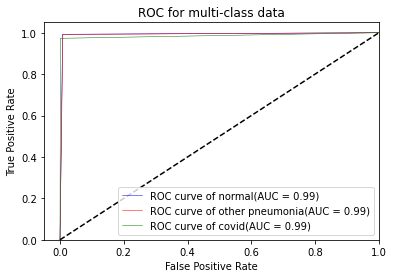

In [ ]:
colors = ['blue', 'red', 'green']
cls = {0:'normal', 1:'other pneumonia', 2:'covid'}
for i, color ,c in zip(range(n_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="lower right")
plt.show()